In [0]:
#Install required library
!pip install torch_nightly -f https://download.pytorch.org/whl/nightly/cu92/torch_nightly.html
!pip install fastai

Looking in links: https://download.pytorch.org/whl/nightly/cu92/torch_nightly.html
     |████████████████████████████████| 576.2MB 29kB/s 


In [0]:
# import libraries
import fastai
from fastai import *
from fastai.text import * 
import pandas as pd
import numpy as np
from functools import partial
import io
import os

In [0]:
# Import 20 newsgroup dataset
from sklearn.datasets import fetch_20newsgroups

In [0]:
dataset = fetch_20newsgroups(shuffle=True, random_state=1, remove=('header', 'footers', 'quotes'))

In [0]:
dataset.target_names

In [0]:
print(dataset.data[0])

print("\n")
print(dataset.target[0])

From: ab4z@Virginia.EDU ("Andi Beyer")
Subject: Re: Israeli Terrorism
Organization: University of Virginia
Lines: 15


17


In [0]:
#Let’s create a dataframe consisting of the text documents and their corresponding labels (newsgroup names).
df = pd.DataFrame({'label': dataset.target, 'text': dataset.data})

In [0]:
df.head()

,label,text
0,17,"From: ab4z@Virginia.EDU (""Andi Beyer"")\nSubjec..."
1,0,From: timmbake@mcl.ucsb.edu (Bake Timmons)\nSu...
2,17,From: bc744@cleveland.Freenet.Edu (Mark Ira Ka...
3,11,From: ray@ole.cdac.com (Ray Berry)\nSubject: C...
4,10,From: kkeller@mail.sas.upenn.edu (Keith Keller...


In [0]:
df.shape

(11314, 2)

We’ll convert this into a binary classification problem by selecting only 2 out of the 20 labels present in the dataset. We will select labels 1 and 10 which correspond to **‘comp.graphics**’ and ‘**rec.sport.hockey**’, respectively.

In [0]:
df = df[df['label'].isin([1,10])]

In [0]:
df.head()

,label,text
4,10,From: kkeller@mail.sas.upenn.edu (Keith Keller...
10,1,From: nfotis@ntua.gr (Nick C. Fotis)\nSubject:...
17,10,From: jwh@sei.cmu.edu (John Huber)\nSubject: R...
24,10,From: jimg@cybernet.cse.fau.edu (Jim Gorycki)\...
28,10,From: farenebt@craft.camp.clarkson.edu (Droopy...


In [0]:
df['label'].unique()

array([10,  1])

In [0]:
df.reset_index(drop=True, inplace=True)

In [0]:
df.head()

,label,text
0,10,From: kkeller@mail.sas.upenn.edu (Keith Keller...
1,1,From: nfotis@ntua.gr (Nick C. Fotis)\nSubject:...
2,10,From: jwh@sei.cmu.edu (John Huber)\nSubject: R...
3,10,From: jimg@cybernet.cse.fau.edu (Jim Gorycki)\...
4,10,From: farenebt@craft.camp.clarkson.edu (Droopy...


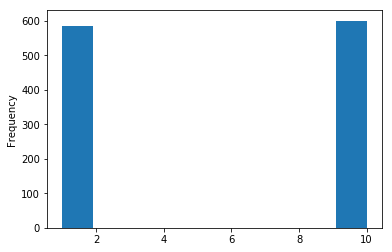

In [0]:
# class label distribution
df['label'].plot(kind='hist')

In [0]:
df['label'].value_counts()

10    600
1     584
Name: label, dtype: int64

Both classes have almost equal distribution.

**Data Preprocessing**

In [0]:
df['text'] = df['text'].str.replace("[^a-zA-Z]", " ")

In [0]:
# remove stop words
import nltk
nltk.download('stopwords')

from nltk.corpus import stopwords
stop_words = stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [0]:
# tokenization and removing stopwords
tokenized_doc = df['text'].apply(lambda x: x.split())

detokenized_doc = tokenized_doc.apply(lambda x: [item for item in x if item not in stop_words])

In [0]:
df['text'] = df['text'].apply(lambda x: " ".join([item for item in x.split() if item not in stop_words]))

In [0]:
df.head()

,label,text
0,10,From kkeller mail sas upenn edu Keith Keller S...
1,1,From nfotis ntua gr Nick C Fotis Subject Apr C...
2,10,From jwh sei cmu edu John Huber Subject Re NHL...
3,10,From jimg cybernet cse fau edu Jim Gorycki Sub...
4,10,From farenebt craft camp clarkson edu Droopy S...


In [0]:
from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(df, test_size = 0.4, random_state=12)

In [0]:
print(df_train.shape, df_test.shape)

(710, 2) (474, 2)


**Prepare data** in ULMFit language model format - using fastai library

In [0]:
# Language model data
data_lang_model_format = TextLMDataBunch.from_df(train_df = df_train, valid_df=df_test, path="")

In [0]:
data_lang_model_format

TextLMDataBunch;

Train: LabelList (710 items)
x: LMTextList
xxbos xxmaj from tiang midway ecn uoknor edu xxmaj tiang xxmaj subject xxup vesa standard xxup vga xxup svga programming xxmaj nntp xxmaj posting xxmaj host midway ecn uoknor edu xxmaj organization xxmaj engineering xxmaj computer xxmaj network xxmaj university xxmaj oklahoma xxmaj norman xxup ok xxup usa xxmaj keywords vga xxmaj lines xxmaj hi i question graphics programming xxup vga xxup svga xxmaj how xxup vesa standard works xxmaj any documentation xxup vesa standard xxmaj at higher resolution xxwrep 4 x xxup vga mode video memory a a xxrep 4 f longer sufficient hold info trick fast image manipulation i heard memory mapping video memory bank switching know nothing implemented xxmaj any advice anyone xxmaj my interest x x mode xxmaj should mode called xxup svga mode xxmaj what technique fast image scrolling mode xxmaj how deal different xxup svga cards xxmaj your xxunk books sources questions would greatly appreciated xxma

In [0]:
data_lang_model_format.train_ds

LabelList (710 items)
x: LMTextList
xxbos xxmaj from tiang midway ecn uoknor edu xxmaj tiang xxmaj subject xxup vesa standard xxup vga xxup svga programming xxmaj nntp xxmaj posting xxmaj host midway ecn uoknor edu xxmaj organization xxmaj engineering xxmaj computer xxmaj network xxmaj university xxmaj oklahoma xxmaj norman xxup ok xxup usa xxmaj keywords vga xxmaj lines xxmaj hi i question graphics programming xxup vga xxup svga xxmaj how xxup vesa standard works xxmaj any documentation xxup vesa standard xxmaj at higher resolution xxwrep 4 x xxup vga mode video memory a a xxrep 4 f longer sufficient hold info trick fast image manipulation i heard memory mapping video memory bank switching know nothing implemented xxmaj any advice anyone xxmaj my interest x x mode xxmaj should mode called xxup svga mode xxmaj what technique fast image scrolling mode xxmaj how deal different xxup svga cards xxmaj your xxunk books sources questions would greatly appreciated xxmaj please send mail xxmaj 

In [0]:
data_lang_model_format.valid_ds

LabelList (474 items)
x: LMTextList
xxbos xxmaj from lusardi cs buffalo edu xxmaj christopher xxmaj lusardi xxmaj subject xxmaj program xxmaj included xxmaj edge xxmaj detection xxmaj algorithms xxmaj article i d acsu c xxunk xxup xxunk xxmaj organization xxmaj state xxmaj university xxmaj new xxmaj york xxmaj buffalo xxmaj comp xxmaj sci xxmaj lines xxmaj nntp xxmaj posting xxmaj host xxunk cs buffalo edu xxmaj this program xxunk edges xxunk operators laplacian operator xxmaj it output raw grey scale images edges xxmaj the output look like edges xxmaj in xxunk terms i correct errors xxmaj any improvements welcome i even accept corrected code xxmaj if i xxunk xxup input xxup image digital gaussian remove noise i get improvement laplacian types edge detection include xxunk h include math h define xxup xxunk define xxup xxunk xxunk char xxmaj input xxmaj image xxup xxunk xxup xxunk xxunk char xxmaj angles xxmaj wanted xxup xxunk xxup xxunk xxunk char xxmaj magnitude xxmaj image xxup xxun

In [0]:
# Classification data model
data_class = TextClasDataBunch.from_df(path="", train_df=df_train, valid_df = df_test, vocab=data_lang_model_format.train_ds.vocab, bs=32)

**Fine Tuning the pre-trained Model and Making prediction**

In [0]:
learner = language_model_learner(data_lang_model_format, pretrained=URLs.WT103, arch=AWD_LSTM, drop_mult=0.7)

In [0]:
# train the model with learning rate = 1e-2
learner.fit_one_cycle(1, 1e-2)

epoch,train_loss,valid_loss,accuracy,time
0,6.567193,5.181221,0.273583,00:11


In [0]:
#save this encoder to use it for classification later.
learner.save_encoder("ft_enc")

In [0]:
# using `data_class` object to build classifier with our fine-tuned encoder
learner = text_classifier_learner(data_class, arch=AWD_LSTM,drop_mult=0.7)

In [0]:
# again try fitting model
learner.fit_one_cycle(1, 1e-2)

epoch,train_loss,valid_loss,accuracy,time
0,0.724033,0.696688,0.500000,00:34
